# Lec155: Programming Illustration - Myopic Search (Introduction)

<img src = "lec155_1.png" alt = "IMG NOT FOUND">
Node 1 doesn't know about the long range contact of Node 10...So it passes to Node 8
=> Myopic / Decentralized Search is not optimal 
<img src = "lec155_2.png" alt = "IMG NOT FOUND">
<img src = "lec155_3.png" alt = "IMG NOT FOUND">

# Lec156:  Myopic Search (Base Code)


In [34]:
import networkx as nx
import matplotlib.pyplot as plt
import random
%matplotlib notebook

def add_edges(G):
    list_nodes = G.nodes()
    #print list_nodes
    for i in range(0, len(list_nodes)):
        #print list_nodes[i], list_nodes[(i+1)%len(list_nodes)], list_nodes[i-1],  list_nodes[(i+2)%len(list_nodes)], list_nodes[i-2]
        G.add_edge(list_nodes[i], list_nodes[(i+1)%len(list_nodes)])
        G.add_edge(list_nodes[i], list_nodes[(i+2)%len(list_nodes)])
        G.add_edge(list_nodes[i], list_nodes[i-1])
        G.add_edge(list_nodes[i], list_nodes[i-2])
    return G

def add_long_link(G):
    v1 = random.choice(G.nodes())
    v2 = random.choice(G.nodes())
    while v1 == v2:
        v1 = random.choice(G.nodes())
        v2 = random.choice(G.nodes())
    G.add_edge(v1, v2)
    #print "Edge Added : ", v1, v2
    return G

def find_best_neighbor(G, current, v):
    choice = ""
    #print "target : ", v
    dist = G.number_of_nodes()
    for each in G.neighbors(current):
        #print "each : ", each
        dist2 = len(nx.shortest_path(H, source=each, target=v))
        if dist2 < dist:
            dist = dist2
            choice = each
    return choice

def myopic_search(G, u, v):
    path = [u]
    current = u
    while(1):
        w = find_best_neighbor(G, current, v)
        path.append(w)
        current = w
        if current == v:
            break
    return path

def set_myopic_path_colors(G, p):
    c = []
    for each in G.nodes():
        if each == p[0]:
            c.append('red')
        elif each == p[len(p)-1]:
            c.append('red')
        elif each in p:
            c.append('blue')
        else:
            c.append('yellow')
    return c

def set_optimal_path_colors(G, p):
    c = []
    for each in G.nodes():
        if each == p[0]:
            c.append('red')
        elif each == p[len(p)-1]:
            c.append('red')
        elif each in p:
            c.append('green')
        else:
            c.append('yellow')
    return c

def set_path_colors(G, p, p2):
    c = []
    for each in G.nodes():
        if each == p[0]:
            c.append('red')
        elif each == p[len(p)-1]:
            c.append('red')
        elif each in p and each in p2:
            c.append('black')
        elif each in p:
            c.append('blue')
        elif each in p2:
            c.append('green')
        else:
            c.append('yellow')
    return c

G = nx.Graph()
G.add_nodes_from(range(100))
G = add_edges(G)
H = G.copy() #To do myopic search

Myopic Path :  [0, 2, 4, 74, 72, 47, 45, 43, 41, 40]
Optimal Path :  [0, 2, 4, 74, 76, 49, 50, 38, 40]
Blue:Myopic, Green:Optimal,  Black:Both


<IPython.core.display.Javascript object>


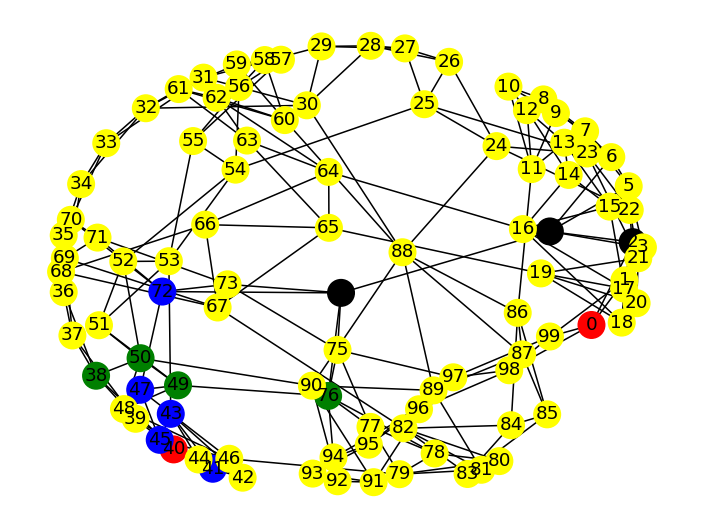

In [35]:
for _ in range(20):
    G = add_long_link(G)
    
p = myopic_search(G, 0, 40)
p2 = nx.shortest_path(G, source = 0, target=40)

#colors = set_myopic_path_colors(G, p)
#colors2 = set_optimal_path_colors(G, p)
colors = set_path_colors(G, p, p2)

print "Myopic Path : ", p
print "Optimal Path : ", p2

print("Blue:Myopic, Green:Optimal,  Black:Both")
plt.figure()
nx.draw(G, with_labels = 1, node_color=colors)


# Lec157:  Myopic Search Comparison to Optimal Search

<img src = "lec157_1.png" alt = "IMG NOT FOUND">
<img src = "lec157_2.png" alt = "IMG NOT FOUND">

<IPython.core.display.Javascript object>


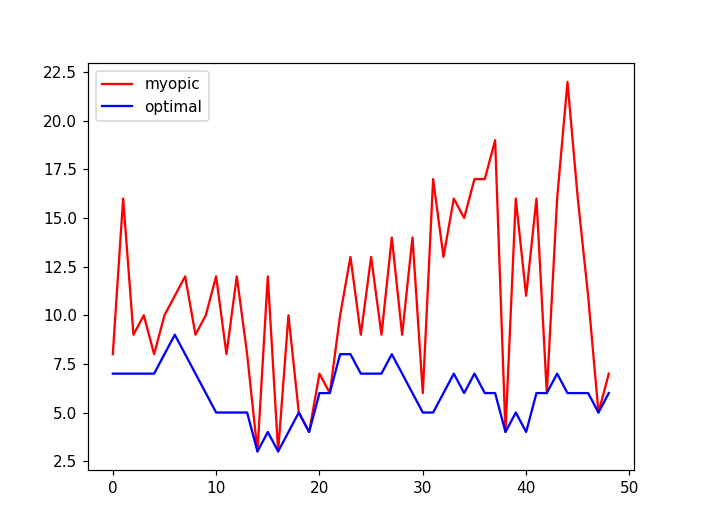

In [37]:
m = [] # path length corresponding to myopic search
o = [] # path length corresponding to optimal search
x = [] # Each point on x axis ((0,50), (1,51), ......)
t = 0
for u in range(0,49):
    v = u+50
    p = myopic_search(G, u, v)
    p2 = nx.shortest_path(G, source=u, target=v)
    m.append(len(p))
    o.append(len(p2))
    x.append(t)
    t += 1
    
plt.figure()
plt.plot(x, m, 'r', label="myopic")
plt.plot(x, o, 'b', label="optimal")
plt.legend()


# Lec158:  Time Taken by Myopic Search 

<img src="lec158_1.png" alt="Img not found">
* Number of weak ties => 10% of total nodes
<img src="lec158_2.png" alt="Img not found">

100 13.9387755102
200 18.4242424242
300 22.8657718121
400 23.6884422111
500 35.1004016064
600 33.9632107023
700 33.564469914
800 40.7192982456
900 45.8797327394
1000 43.3887775551


<IPython.core.display.Javascript object>


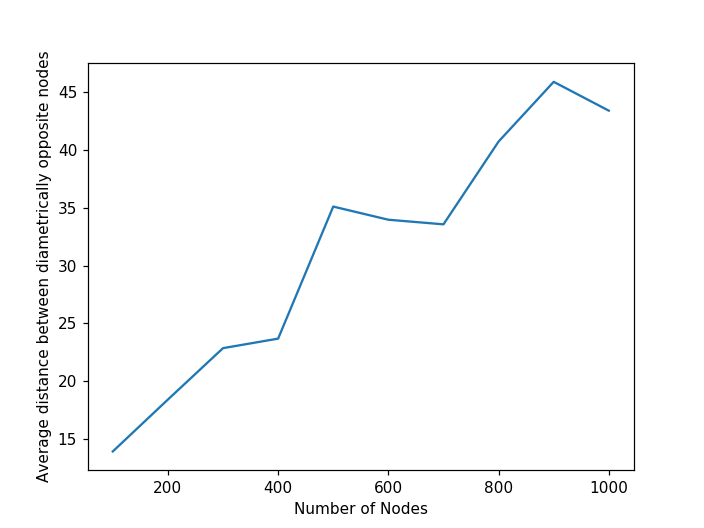

In [43]:
import numpy as np
x1 = []
y1 = []

for num in range(100, 1001, 100):
    G = nx.Graph()
    G.add_nodes_from(range(0, num))
    G = add_edges(G)
    H = G.copy()
    
    #add_long_link
    t = 0
    while t<=G.number_of_nodes()/10 :
        add_long_link(G)
        t += 1
    
    m = [] # path length corresponding to myopic search
    x = [] # Each point on x axis ((0,50), (1,51), ......)
    t = 0
    for u in range(0,G.number_of_nodes()/2 -1):
        v = u+G.number_of_nodes()/2
        p = myopic_search(G, u, v)
        m.append(len(p))
        x.append(t)
        t += 1
    y1.append(np.average(m))
    x1.append(G.number_of_nodes())
    print G.number_of_nodes(), np.average(m)
    
plt.figure()
plt.plot(x1, y1)
plt.xlabel("Number of Nodes")
plt.ylabel("Average distance between diametrically opposite nodes")